<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/Machine-Learning/blob/main/ML/classes/class_march_3/class_march_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Clase de Marzo 29 sobre Muestreo estratificado

Scikit-Learn proporciona algunas funciones para dividir conjuntos de datos en múltiples subconjuntos de varias maneras. 

La función más simple es `train_test_split()`, que hace más o menos lo mismo que la función `split_train_test()`, con un par de características adicionales.

Primero, hay un parámetro `random_state` que le permite establecer la semilla del generador aleatorio.

En segundo lugar, puede pasarle varios conjuntos de datos con un número idéntico de filas y los dividirá en los mismos índices (esto es muy útil, por ejemplo, si tiene un marco de datos separado para las etiquetas):

In [1]:
import numpy as np 
import pandas as pd 
v = pd.read_csv('vivienda.csv') 

In [2]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(v, test_size=0.2, random_state=42)


Hasta ahora hemos considerado métodos de muestreo puramente aleatorios.

Esto generalmente está bien si su conjunto de datos es lo suficientemente grande (especialmente en relación con la cantidad de atributos), pero si no lo es, corre el riesgo de introducir un **sesgo de muestreo significativo**. 

Cuando una empresa de encuestas decide llamar a 1000 personas para hacerles algunas preguntas, no elige a 1000 personas al azar en una guía telefónica. 

Intentan asegurarse de que estas 1.000 personas sean representativas de toda la población. 

Por ejemplo, la población de EE. UU. es 51,3 % de mujeres y 48,7 % de hombres, por lo que una encuesta bien realizada en EE. UU. intentaría mantener esta proporción en la muestra: 513 mujeres y 487 hombres.

Esto se denomina muestreo estratificado:  

* la población se divide en subgrupos homogéneos llamados **estratos**, 
* y se **muestrea** el número correcto de instancias de cada estrato para garantizar que el conjunto de prueba sea representativo de la población general.

Si las personas que realizan la encuesta usaran un muestreo puramente aleatorio, habría alrededor de un 12 % de posibilidades de muestrear un conjunto de prueba sesgado que tuviera menos del 49 % de mujeres o más del 54 % de mujeres.

Either way, the survey results would be significantly biased.

Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. 

You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. 

Since the median income is a continuous numerical attribute, you first need to create an income category attribute. 

Let’s look at the median income histogram more closely (back in Figure 2-8): most median income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some median incomes go far beyond 6. 

It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. 

This means that you should not have too many strata, and each stratum should be large enough. 

The following code uses the `pd.cut()` function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on:

In [4]:
v["ingresos_cat"] = pd.cut(v["ingresos"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],\
                           labels=[1, 2, 3, 4, 5])

These income categories are represented in Figure 2-9:

<AxesSubplot:>

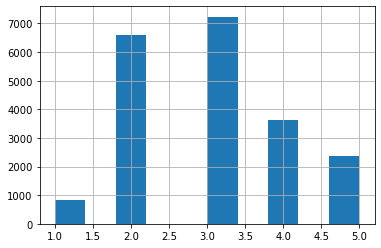

In [5]:
v["ingresos_cat"].hist()

Now you are ready to do stratified sampling based on the income category. 

For this you can use Scikit-Learn’s StratifiedShuffleSplit class:

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit


In [7]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [8]:
for train_index, test_index in sss.split(v, v["ingresos_cat"]):
    strat_train_set = v.loc[train_index]
    strat_test_set = v.loc[test_index]

Veamos si esto funcionó como se esperaba. 

Puede comenzar observando las proporciones de las categorías de ingresos en el conjunto de prueba:

In [9]:
 strat_test_set["ingresos_cat"].value_counts() / len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: ingresos_cat, dtype: float64

With similar code you can measure the income category proportions in the full dataset. 

Figure 2-10 compares the income category proportions in the overall
dataset, in the test set generated with stratified sampling, and in a test set
generated using purely random sampling. 

As you can see, the test set generated
using stratified sampling has income category proportions almost identical to
those in the full dataset, whereas the test set generated using purely random
sampling is skewed.

<img src = ''>

## Referencias  

* La clase StratifiedShuffleSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html